In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua, u_grid
import numpy.ma as ma
import pickle as pkl
from eod import mfg
from utils import u_grid, u_interpolate as u_int

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [21]:
msg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_-40_700km2_-50points_dominant_2004_09.nc'
msg_avg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_avgInter_MSG_-40_700km2_-50points_dominant_2004_09.nc'
mfg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_MFG_-40_700km2_-50points_dominant_2004_09.nc'

In [128]:
ar_msg = xr.open_dataset(msg_file)
ar_avg_msg = xr.open_dataset(msg_avg_file) 
ar_mfg = xr.open_dataset(mfg_file)

In [129]:
day=37
tmsg = ar_msg.isel(time=day)
tmsg_avg = ar_avg_msg.isel(time=day)
tmfg = ar_mfg.isel(time=day)

tmsg['tir'].values = tmsg['tir']/100
tmsg_avg['tir'].values = tmsg_avg['tir']/100
tmfg['tir'].values = tmfg['tir']/100

tmsg['tir'].values[tmsg['tir']>=-10] = 0
tmsg_avg['tir'].values[tmsg_avg['tir']>=-10] = 0
tmfg['tir'].values[tmfg['tir']>=-10] = 0

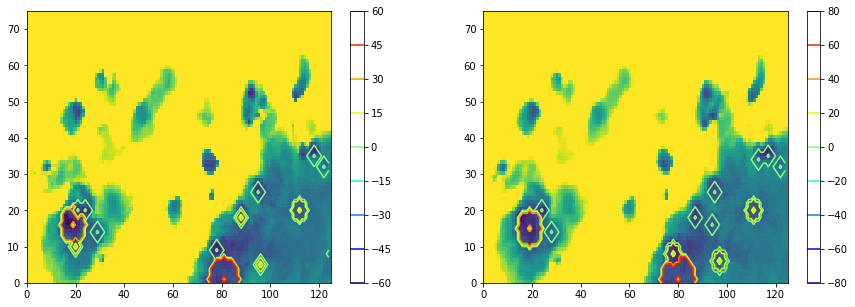

In [98]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,9) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

box = [100,250,160, 200]
box = [125,200,75,200]

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
plt.pcolormesh(tmsg['tir'][box[0]:box[1], box[2]:box[3]], vmax=-40)
plt.contour(tmsg['blobs'][box[0]:box[1], box[2]:box[3]], cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(tmfg['tir'][box[0]:box[1], box[2]:box[3]], vmax=-40)
plt.contour(tmfg['blobs'][box[0]:box[1], box[2]:box[3]], cmap='jet')
plt.colorbar()

In [99]:
ar_msg_copy = tmsg.copy(deep=True)
ar_msg_copy['blobs'].values[(ar_msg_copy['blobs'] < 16) | (ar_msg_copy['blobs'] > 80)] = 0
tmfg['blobs'].values[(tmfg['blobs'] < 16) | (tmfg['blobs'] > 80)] = 0

In [108]:
tmfg['blobs'].values[tmfg['blobs'].values<0]=0
ar_msg_copy['blobs'].values[ar_msg_copy['blobs'].values<0]=0

In [110]:
np.sum(ar_msg_copy['blobs'].values<-10)

0

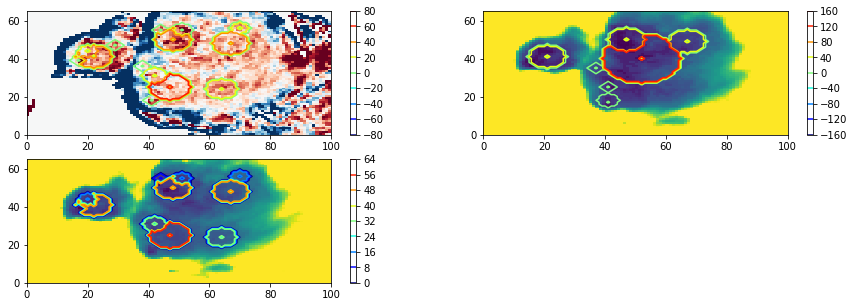

In [152]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,9) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

box = [100,250,160, 200]
box = [125,200,75,200]
box = [200,265,500,600]

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(221)
plt.pcolormesh(tmsg['tir'][box[0]:box[1], box[2]:box[3]]-tmfg['tir'][box[0]:box[1], box[2]:box[3]], vmin=-5, vmax=5, cmap='RdBu')
plt.contour(tmsg['blobs'][box[0]:box[1], box[2]:box[3]], cmap='jet')
plt.colorbar()
ax = f.add_subplot(222)
plt.pcolormesh(tmfg['tir'][box[0]:box[1], box[2]:box[3]], vmax=-40)
plt.contour(tmfg['blobs'][box[0]:box[1], box[2]:box[3]], cmap='jet')
plt.colorbar()
ax = f.add_subplot(223)
plt.pcolormesh(ar_msg_copy['tir'][box[0]:box[1], box[2]:box[3]], vmax=-40)
plt.contour(ar_msg_copy['blobs'][box[0]:box[1], box[2]:box[3]], cmap='jet')
plt.colorbar()

In [143]:
msg_ones = (ar_msg_copy['blobs'] > 0).astype(int)
mfg_ones = (tmfg['blobs'] > 0).astype(int)

In [144]:
mfg_ones.astype(int)

<xarray.DataArray 'blobs' (lat: 296, lon: 674)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
    time     datetime64[ns] 2004-09-01T18:30:00

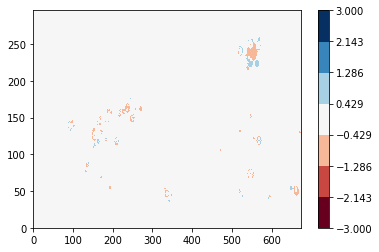

In [145]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-3,3,8) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(msg_ones - mfg_ones, cmap='RdBu', norm=norm)
plt.colorbar()

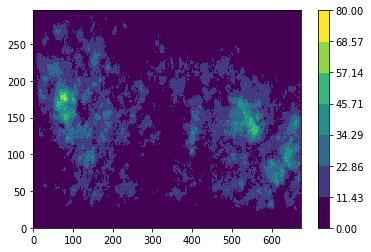

In [43]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(0,80,8) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('viridis')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(mfg_blobs, cmap='viridis', norm=norm)
plt.colorbar()

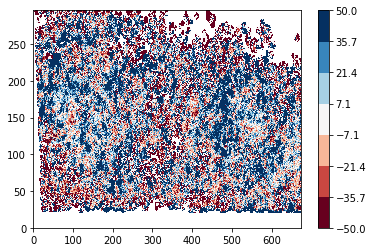

In [10]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-50,50,8) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(((msg_blobs-mfg_blobs)/mfg_blobs)*100, cmap='RdBu', norm=norm)
plt.colorbar()

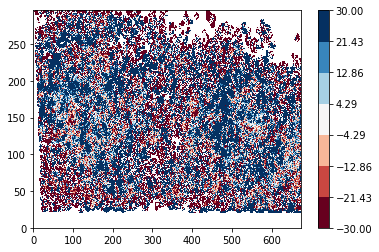

In [13]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-30,30,8) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(((msg_blobs-mfg_blobs)/mfg_blobs)*100, cmap='RdBu', norm=norm)
plt.colorbar()

In [4]:
gridll = pkl.load( open (cnst.network_data + 'data/OBS/saves/VERA_msg_latlon_18W12E_1N17N.p', 'rb'))
grid = u_grid.make(gridll['lon'].values, gridll['lat'].values, 5000)
srtm = xr.open_dataset(cnst.WA_TOPO_1MIN)

In [50]:
srtm=srtm.sel(lon=slice(-20,20), lat=slice(0,25))

In [51]:
grid.ll_coordinates[1]

array([[ 3.91238713,  3.91238713,  3.91238713, ...,  3.91238713,
         3.91238713,  3.91238713],
       [ 3.95749759,  3.95749759,  3.95749759, ...,  3.95749759,
         3.95749759,  3.95749759],
       [ 4.00260555,  4.00260555,  4.00260555, ...,  4.00260555,
         4.00260555,  4.00260555],
       ...,
       [16.996641  , 16.996641  , 16.996641  , ..., 16.996641  ,
        16.996641  , 16.996641  ],
       [17.03985463, 17.03985463, 17.03985463, ..., 17.03985463,
        17.03985463, 17.03985463],
       [17.08305816, 17.08305816, 17.08305816, ..., 17.08305816,
        17.08305816, 17.08305816]])

In [52]:
topo = u_int.regrid_irregular_quick(srtm['lon'].values, srtm['lat'].values, grid.ll_coordinates[0], grid.ll_coordinates[1], srtm['h'].values)

In [53]:
topo_ar = xr.DataArray(topo, coords={'lat' : grid.ll_coordinates[1][:,0], 'lon': grid.ll_coordinates[0][0,:]}, dims=['lat', 'lon'])

In [62]:
topo_ar = topo_ar.isel(lat=slice(0,-2))

In [64]:
topo_ar.to_netcdf(cnst.network_data + 'data/OBS/saves/vera_5k_topo.nc')

In [86]:
msg_blobs.values[topo_ar>300]=0
mfg_blobs.values[topo_ar>300]=0
msg_blobs.values[topo_ar==0]=0
mfg_blobs.values[topo_ar==0]=0

In [87]:
msg_cut=msg_blobs.sel(lat=slice(4,15), lon=slice(-15,0))
mfg_cut=mfg_blobs.sel(lat=slice(4,15), lon=slice(-15,0))

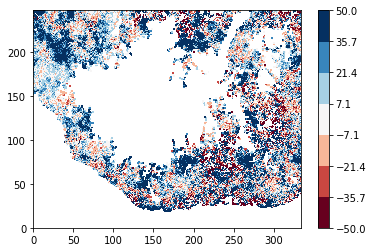

In [88]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

levels = np.linspace(-50,50,8) #MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('RdBu')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.pcolormesh(((msg_cut-mfg_cut)/mfg_cut)*100, cmap='RdBu', norm=norm)
plt.colorbar()